In [160]:
import pandas as pd

In [161]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names = ["sepal length", "sepal width", 'petal length', 'petal width', 'target'])

In [162]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Standardize the data

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [165]:
x = df.loc[:, features].values

In [166]:
y = df.loc[: ,['target']].values

In [167]:
x_std = StandardScaler().fit_transform(x)

# PCA projection to 2D

In [168]:
from sklearn.decomposition import PCA

In [169]:
pca = PCA(n_components = 2)

In [170]:
principalcomponents = pca.fit_transform(x_std)

In [171]:
principalcomponents =  pd.DataFrame(principalcomponents, columns=['pca 1', 'pca 2'])

In [172]:
final_pca = pd.concat([principalcomponents, df['target']], axis = 1)

In [173]:
final_pca

,pca 1,pca 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


# Data Visualization 

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

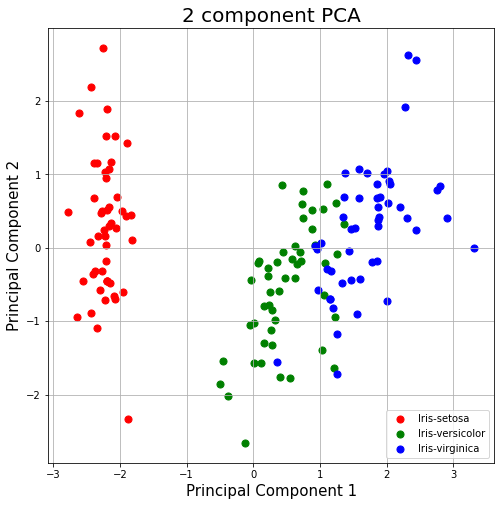

In [175]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize =  15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target,color in zip(targets,colors):
    indicestokeep = df['target'] == target
    ax.scatter(final_pca.loc[indicestokeep,'pca 1'], final_pca.loc[indicestokeep,'pca 2'], c= color, s = 50)
ax.legend(targets)
ax.grid()

In [176]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# Lets work on MNIST

In [177]:
df = pd.read_csv('downloads/mnist_train.csv')

In [178]:
df.shape

(60000, 785)

In [179]:
data = df.values

In [180]:
X = data[:,1:]
Y = data[:, 0]

In [181]:
Y

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
train_img, test_img, train_lbl, test_lbl = train_test_split(X,Y,test_size = 0.2)

In [184]:
X_ = train_img

In [185]:
scalar = StandardScaler()

In [186]:
scalar.fit(train_img)

StandardScaler()

In [187]:
train_img = scalar.transform(train_img)
test_img = scalar.transform(test_img)

In [188]:
# chose the minium number of principal components such 95% of the variance are maintained

In [189]:
pca  = PCA(.95)

In [190]:
pca.fit(train_img)

PCA(n_components=0.95)

In [191]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [192]:
test_img.shape

(12000, 327)

In [194]:
approx = pca.inverse_transform(train_img)

In [195]:
pca.n_components_

326

In [196]:
from sklearn.linear_model import LogisticRegression

In [197]:
logisticRegr = LogisticRegression()

In [198]:
logisticRegr.fit(train_img, train_lbl)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# prediction part

In [199]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array([4], dtype=int64)

In [200]:
logisticRegr.predict(test_img)

array([4, 3, 4, ..., 5, 0, 4], dtype=int64)

# Data Visualisation 

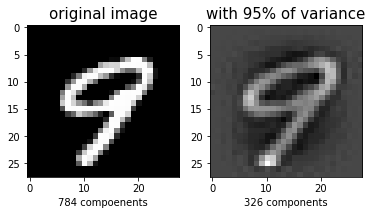

In [210]:
plt.figure(figsize = (6,6))
plt.subplot(1,2,1)
plt.imshow(X_[1].reshape(28,28), cmap="gray")
plt.xlabel('784 compoenents', fontsize = 10)
plt.title('original image',fontsize= 15)

plt.subplot(1,2,2)
plt.imshow(approx[1].reshape(28,28), cmap = 'gray')
plt.xlabel('326 components', fontsize= 10)
plt.title('with 95% of variance', fontsize= 15)
plt.show()

In [209]:
logisticRegr.score(test_img, test_lbl) #accurancy

0.92175